In [2]:
# Credits: https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/
# LSTM for sequence classification in the IMDB dataset
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM , SimpleRNN
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)

In [3]:
#Refer: https://keras.io/datasets/#imdb-movie-reviews-sentiment-classification

# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words)


17473536/17464789 [==============================] - 0s 0us/step


In [11]:
print(X_train[11])
print('The lenght of the sentence ==>',len(X_train[11]))
print('Train data shape ==>',X_train.shape)
print('Test data shape ==>',X_test.shape)

[1, 54, 13, 1610, 14, 20, 13, 69, 55, 364, 1398, 21, 54, 13, 219, 12, 13, 1706, 15, 4, 20, 16, 329, 6, 176, 329, 74, 51, 13, 873, 4, 156, 71, 78, 4, 2, 322, 16, 31, 7, 4, 249, 4, 65, 16, 38, 379, 12, 100, 157, 18, 6, 910, 20, 549, 18, 4, 1496, 21, 14, 31, 9, 24, 6, 212, 12, 9, 6, 1322, 991, 7, 3002, 4, 425, 9, 73, 2218, 549, 18, 31, 155, 36, 100, 763, 379, 20, 103, 351, 2, 13, 202, 12, 2241, 5, 6, 320, 46, 7, 457]
The lenght of the sentence ==> 99
Train data shape ==> (25000,)
Test data shape ==> (25000,)


(25000,)

In [6]:
max(numpy.max(X_test))

4998

In [19]:
# truncate and/or pad input sequences
max_review_length = 200
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

print(X_train.shape)
print(X_train[1])

(25000, 200)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0  163   11 3215    2    4 1153    9  194  775    7    2    2
  349 2637  148  605    2    2   15  123  125   68    2    2   15  349
  165 4362   98    5    4  228    9   43    2 1157   15  299  120    5
  120  174   11  220  175  136   50    9 4373  228    2    5    2  656
  245 2350    5    4    2  131  152  491   18    2   32    2 1212   14
    9    6  371   78   22  625   64 1382    9    8  168  145   23    4
 1690   15   16    4 1355    5   28    6   52  154  462   33   8

In [8]:
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(SimpleRNN(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
#Refer: https://datascience.stackexchange.com/questions/10615/number-of-parameters-in-an-lstm-model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 600, 32)           160000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 100)               13300     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 173,401
Trainable params: 173,401
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
import keras
his = keras.callbacks.History()
call = [his]
model.fit(X_train, y_train, epochs=10,validation_data = (X_train, y_train), batch_size=264 , verbose= 2 , callbacks = call)


Epoch 1/10
95/95 - 66s - loss: 0.6825 - accuracy: 0.5610 - val_loss: 0.6693 - val_accuracy: 0.5479 - 66s/epoch - 698ms/step
Epoch 2/10
95/95 - 65s - loss: 0.6034 - accuracy: 0.6763 - val_loss: 0.5706 - val_accuracy: 0.7398 - 65s/epoch - 687ms/step
Epoch 3/10
95/95 - 66s - loss: 0.4649 - accuracy: 0.7870 - val_loss: 0.3415 - val_accuracy: 0.8584 - 66s/epoch - 694ms/step
Epoch 4/10
95/95 - 64s - loss: 0.3251 - accuracy: 0.8674 - val_loss: 0.2556 - val_accuracy: 0.9021 - 64s/epoch - 678ms/step
Epoch 5/10
95/95 - 64s - loss: 0.2683 - accuracy: 0.8941 - val_loss: 0.2942 - val_accuracy: 0.8884 - 64s/epoch - 678ms/step
Epoch 6/10
95/95 - 64s - loss: 0.3335 - accuracy: 0.8592 - val_loss: 0.2723 - val_accuracy: 0.8918 - 64s/epoch - 671ms/step
Epoch 7/10
95/95 - 64s - loss: 0.4008 - accuracy: 0.8182 - val_loss: 0.3720 - val_accuracy: 0.8310 - 64s/epoch - 672ms/step
Epoch 8/10
95/95 - 64s - loss: 0.3317 - accuracy: 0.8633 - val_loss: 0.2789 - val_accuracy: 0.8874 - 64s/epoch - 671ms/step
Epoch 9/

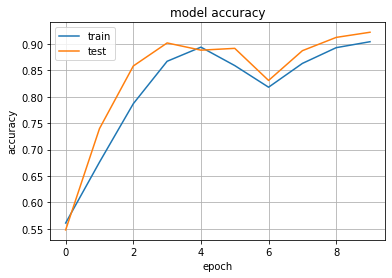

In [16]:
import matplotlib.pyplot as plt
plt.plot(his.history['accuracy'])  
plt.plot(his.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.grid()  
plt.legend(['train', 'test'])  
plt.show()

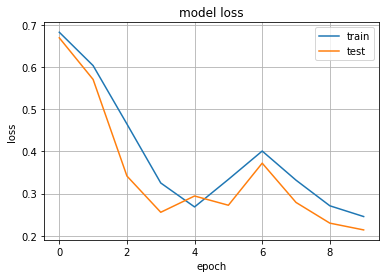

In [15]:
import matplotlib.pyplot as plt
plt.plot(his.history['loss'])  
plt.plot(his.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.grid()  
plt.legend(['train', 'test'])  
plt.show()

In [13]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 84.06%
